Welcome to the course!

If you have downloaded all of the pre-reqs, as described in this repository's README, you should be able to run all of the cells in this notebook.

After executing the final cell, your notebook should produce a graph. Please send that graph to me at your convenience to verify that everything's working for you.

You won't understand everything that's happening in this notebook, and that's perfectly okay. Just read the directions and watch along, and get an (intuitive, nontechnical) sense for what's going on. We'll discuss all of this in much more detail together.

There are **questions** in this notebook. The course coordinator will communicate the due-date for these answers to you.

In [1]:
# Import the requirements
%pylab inline
from xgboost.sklearn import XGBRegressor
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Datasets, features & dimensionality

Put simply, **datasets** are *collections of numbers*.

Datasets can be described in various ways.
1. By what they represent
2. By their *dimensionality* & *size*, known together as their *shape*

Let's start with point 1. First and foremost, datasets represent observations from the word.

To illustrate, let's load an example dataset - [Boston home prices](https://scikit-learn.org/stable/datasets/index.html#boston-dataset)! Take a look at that documentation page. This dataset *represents* neighborhoods in Boston. It represents neighborhoods (*samples*) by describing them numerically, across categories such as crime rate, highway accessibility, tax rate, etc. These descriptions are called **features**.

In machine learning, samples are described by their features, and only by their features. Collections of samples are **datasets**.


In [2]:
boston = load_boston()

*Note: This is a version of the famous UC Irvine housing dataset (yes, in ML, there are famous datasets!).*

Now we've loaded our dataset, `boston`. Let's look at the "shape" of this data.


In [3]:
boston.data.shape

(506, 13)

What does this *shape* mean? It's a list of numbers. The first number describes how many samples (neighborhoods) are in the dataset: 506. The second number describes how many features are used to describe each neighborhood: 13.

Imagine a matrix (or a spreadsheet) of 506 rows and thirteen columns. That's effectively what we're looking at here.

Now, you've almost certainly heard people talk about *big data* in your life. What exactly does this phrase mean? Well, it can refer to two aspects of datasets, both of which are captured by shape. First, a dataset can be *big* if it has a large number of samples. That's intuitive: you can have millions or billions of observations in a large dataset.

Second, a dataset can be *big* if it has a high **dimensionality**. Dimensionality is an extremely fancy word for how many numbers are in the list of the data's `shape`. Our dataset has a dimensionality of 2. Remember, this makes sense: it can be thought of as a spreadsheet, which is a two-dimensional form.

> **Question 1**: I have a sensor that measures electromagnetic radiation--described by a single number---500 times per second. I record this sensor for four seconds. What is the **dimensionality** of my dataset?


In [4]:
# what is the dimensionality of my dataset?

Let's cement our understanding by looking at the actual guts of the dataset---the numbers.

First, let's look at the first neighborhood in the dataset.

In [5]:
boston.data[0, :]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

We took the first item of `boston` to see a row of the dataset. These numbers represent each feature of this neighborhood.

Now let's look at crime per capita across all neighborhoods.

In [6]:
boston.data[:, 0]

array([6.32000e-03, 2.73100e-02, 2.72900e-02, 3.23700e-02, 6.90500e-02,
       2.98500e-02, 8.82900e-02, 1.44550e-01, 2.11240e-01, 1.70040e-01,
       2.24890e-01, 1.17470e-01, 9.37800e-02, 6.29760e-01, 6.37960e-01,
       6.27390e-01, 1.05393e+00, 7.84200e-01, 8.02710e-01, 7.25800e-01,
       1.25179e+00, 8.52040e-01, 1.23247e+00, 9.88430e-01, 7.50260e-01,
       8.40540e-01, 6.71910e-01, 9.55770e-01, 7.72990e-01, 1.00245e+00,
       1.13081e+00, 1.35472e+00, 1.38799e+00, 1.15172e+00, 1.61282e+00,
       6.41700e-02, 9.74400e-02, 8.01400e-02, 1.75050e-01, 2.76300e-02,
       3.35900e-02, 1.27440e-01, 1.41500e-01, 1.59360e-01, 1.22690e-01,
       1.71420e-01, 1.88360e-01, 2.29270e-01, 2.53870e-01, 2.19770e-01,
       8.87300e-02, 4.33700e-02, 5.36000e-02, 4.98100e-02, 1.36000e-02,
       1.31100e-02, 2.05500e-02, 1.43200e-02, 1.54450e-01, 1.03280e-01,
       1.49320e-01, 1.71710e-01, 1.10270e-01, 1.26500e-01, 1.95100e-02,
       3.58400e-02, 4.37900e-02, 5.78900e-02, 1.35540e-01, 1.281

Crime per capita is the first feature in the dataset, so we took a slice along the zeroth axis of the dataset's second dimension to see the asset price of all houses.

> **Question 2**: Find the NOX (nitric oxides concentration) of the third house in the dataset.

In [7]:
# Find the NOX (nitric oxides concentration) of the third house in the dataset.

A parting thought: you may be wondering what dataset could be possibly be higher dimensionality than two. What can't be described by a spreadsheet? Images are an everyday example of a higher-dimensional dataset. A black and white, 512x512 pixel image is itself two-dimensional---its shape is `(512, 512)`, where each feature represents a shade from 0 (black) to 1 (white) at a particular x, y position. If I have 50 such images, my dataset's shape is `(50, 512, 512)`. That's a three-dimensional dataset already, and we haven't added color yet!

Digital colors are typically represented by red, green, and blue (RGB), as you may know if you've done any graphic design before. A color 512x512 photo has a shape of `(512,512,3)` - one channel for each color. For scale, the famous ImageNet dataset has 14,197,122 color images. That's big data, in both size and dimensionality!

> **Question 3**: I have 500 color movies. Each movie is compressed to 1024x768 pixels, and each movie is twelve seconds long---about 300 frames. What is the dimensionality of my dataset?


In [ ]:
# What is the dimensionality of my dataset?

# Training, testing, labels & overfitting

Now let's do some machine learning. Before we do, let's discuss **training**. Training is the *learning* part of machine learning: an algorithm studies data. **Testing** means an algorithm applying what it has learned to data it has never seen before; making predictions about new data based on past experience.

In class, we'll talk more about the two ways of viewing this *training*/*learning* process, both statistically and neuroscientifically. We'll also discuss this *testing*/*predicting* process from a statistical and cognitive standpoint. In the end, you'll see that our cognitive and statistical understandings are really two ways of expressing the same thing---and our biological brains and digital ML algorithms are, too!

First, an important---nay, *the most important* note: we must separate our training data from our testing data.
In fact, we must *always* train and test on different data.

Why? We'll discuss this more in class, but here's a brief intuition: Let's say you want to teach a child how to do multiplication. You show them the multiplication tables for 2s: 2x2=4, 3x2=6, etc... and have them memorize this table up to 10. Now you ask them to multiply 2x11, or 2x3. Will they get it right? Maybe... However, they may equally well have done as you said, and memorized the relationships in front of them, rather than learning the underlying rule. That would leave them totally clueless when presented with a new number like 3x11. In machine learning, such memorization is what we call **overfitting**.

Now, if we gave the child a greater variety of examples (also multiplying by 3, 4, 8, mixing up the order of the numbers), the child would be more likely to learn the real relationship: the true way to multiply two numbers together. This is the *model* we're looking to *train* (learn).

Here's another way of looking at the situation: The child who memorized the two's table ends up with a copy of the two's table. The child who memorized a diverse set of examples ends up with a more elegant representation---the formula for multiplication---a model that will allow the child to perform any multiplication problem in the universe, given enough time.  In machine learning, **we use datasets to learn models that will describe data we haven't seen yet**.

Again, we'll discuss this *overfitting*/*memorizing* relationship from statistics and neuroscience. In the meantime, we'll separate our training and testing data using a built-in function from `sklearn`. This will reserve 33% of our data for testing.


In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.33, random_state=42)

Speaking of memorization, it's time for you to memorize some common machine learning conventions. `X` (upper case) refers to features. `y` (lower case) refers to **labels**. Labels are simply a special kind of feature that we want to predict---our "feature of interest." In this case, we may want to predict median home price in a neighborhood given the neighborhood's attributes---that makes median home price the **label**.

In the above command, we collected the training and testing data (`X_train` and `X_test`) along with the labels for both sets (`y_train` and `y_test`). All of these conventions eventually become second-nature.

Now, time to create a new regressor. If you're familiar with linear regression---yes, regression is a very simple kind of machine learning! Watch:

In [9]:
# Create a new regressor
from xgboost import XGBRegressor
regr = XGBRegressor()

In [10]:
# Fit the regressor to the training data
regr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [11]:
# Use this regressor to predict labels for the testing data
y_pred = regr.predict(X_test)

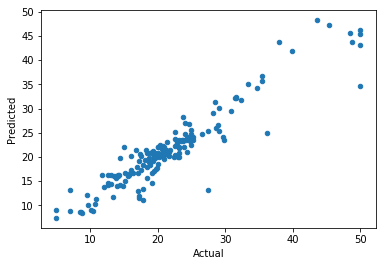

In [12]:
# Plot the predicted labels against the actual labels
predictions = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
predictions.plot.scatter(x='Actual', y='Predicted')

> **Question 4**: Send me the graph above. No trick question here---I just want to make sure you have all the necessary packages installed.

What just happened? Well, we *trained* a model by telling our regressor to `fit` (another word for "train") to the `X_train` data and its `y_train` labels, home prices. Then, we *tested* the model by calling `regr.predict` on the `X_test` data, producing predicted home prices `y_pred`. Finally, we plotted the actual home prices against our predicted ones. You can see that we got pretty close!

I mentioned linear regression above. You've probably see linear regression drawing a straight line along a two-dimensional scatterplot. Guess what? *Linear regression learns a model on a two-dimensional dataset*. So you've been doing machine learning this whole time!

If you're a statistician the only "cool" feature of machine learning is that ML can work on data of any dimension, and the "lines" it draws don't need to be straight. We'll talk more about these "lines" on the first day of class.

However, I'd like to convince you that machine learning has a lot more "cool" features than just what statisticians appreciate. Machine learning is cool because it lets us play with toy models of the human brain; machine learning is a powerful tool for assisting human labor because it's capable of percieving the world---and acting in it---in a way that's inspired by us, its creators.

# Reading

On that note, it's time for you to learn a little bit more about the brain. Please read the **required** readings before class. I recommend the optional readings as well, *especially*
if the technical exercises above were easy for you, and/or if the required readings aren't telling you anything new.

## Required


Searle, [No ghost in the machine](http://articles.latimes.com/2003/oct/12/books/bk-searle12), 2003. LA Times.

> Here, John R Searle, a famous philosopher of mind, reviews (and helpfully summarizes) a book about consciousness by Adam Zeman. Pay particular attention to Searle's "three facts" on page one, and his discussion of conscious machines on page 2. The key points here: We are conscious for biological reasons alone, and we can build machines that are conscious, too.

Merrill et al, [Is the Future of Authenticity All In Our Heads? Moving Passthoughts From the Lab to the World](https://cosmopol.is/assets/nspw2017.pdf), 2017. NSPW.

> This is a fun, light introduction to a technology we will talk about much more in class: passthoughts. In sum, Passthought authentication allows you to think a secret thought to log into things. A brainscanning device collects signatures of the corresponding neural activity and uses them as a password, or passthought.Why passthoughts? Well, traditional passwords are easy to guess and difficult to remember, while possession factors (like phones or fobs) are easy to lose. Meanwhile, biometric identifiers like fingerprints are easy to steal and difficult to change (remember the eyeball transplant scene from Minority Report?). Passthoughts combine multiple factors of authentication into a single step: a knowledge factor (your secret thought), and a biometric factor (the unique way you express your thought neurally). Passthoughts are easy to change, but tough for an attacker to fake, even if they know their target's secret thought.

> This paper serves mostly to introduce you to passthoughts, and outline some of the fun things to think about there. We'll discuss the technical details in class, and I include a more technical paper of ours in the optional readings, below.

Kay & Gallant, [I Can See What You See](http://cvnlab.net/papers/KayNatureNeuroscience2009.pdf), 2009. Nature.

> In this classic paper, Jack Gallant and colleagues decode visual input from fMRI readings. In short, they are able to see what participants see by looking at scans of participants' brains. A cool application of machine learning. We won't be dealing with readings as high-dimensional as fMRI, but this paper gives you a taste of what brainscanning + machine learning can do together. Use this paper to learn a little bit more about the brain, and let it fire your imagination as you get ready for the coming course.


## Optional


Weber et al, [Imagination-Augmented Agents for Deep Reinforcement Learning](http://papers.nips.cc/paper/7152-imagination-augmented-agents-for-deep-reinforcement-learning.pdf), 2017. NIPS.

> Don't worry if you don't understand all the terms in this paper. The key point
here is that cognitive functions are very often modeled in ML algorithms. Doing
so can often help us think about familiar capabilities such as
imagination in a new way, helping us understand, from a computational
perspective, why us mammals may have evolved these capabilities in the first
place.

Clark, [Whatever next? Predictive brains, situated agents, and the future of cognitive science](https://doi.org/10.1017/S0140525X12000477), 2013. Behavioral and Brain Sciences (36:3).

> Think of this as a companion to Searle's review, above. This paper outlines the "hierarchical prediction machine" (HPM) theory of the brain---the theory we will be working with in the course. As you'll see, the HPM theory lets us view machine learning and human cognition as fundamentally similar, and helps us understand where ML needs to go in order to develop a so-called "general artificial intelligence" that's more similar to human intelligence. We will discuss this theory in person at length, but if you want a preview, this is a good introduction from an expert.

Curran et al, [Exploring the Feasibility and Performance of One-step Three-factor Authentication with Ear-EEG](https://cosmopol.is/assets/phycs2018.pdf), 2018. PhyCS.

> This is a more technical treatment of our current work on passthoughts.

Piplani et al, [Faking it, Making it: Fooling and Improving Brain-Based Authentication with Generative Adversarial Networks](https://cosmopol.is/assets/btas2018.pdf), 2018. IEEE BTAS.

> This paper tries to *hack* our passthoughts system, also using machine learning. You may have heard of GANs---generative adversarial networks. This paper explains GANs a bit, and demonstrates a relevant application. GANs are most famous for generating fake imagery, such as realistic faces. They have all kinds of applications, so let this paper serve as an introduction if you are interested in the generative capacities of ML.

Martinovic et al, [On the Feasibility of Side-Channel Attacks with Brain-Computer Interfaces](https://www.usenix.org/system/files/conference/usenixsecurity12/sec12-final56.pdf), 2012. USENIX.

> This paper also uses EEG, the brainscanning modality we'll be working with in our course. They demonstrate a way to use EEG for hacking. I always think of this paper as the "evil twin" of our passthought work.

## Extra-credit question

For the purposes of this class, we will assume the mind is strictly physical (i.e., "no ghost in the machine"). However, that does not mean that the mind and the brain are strictly identical. The mind may be more expansive than the brain, extending to the body or beyond the body. Briefly, explain whether you think this is the case, citing sources where appropriate.